In [1]:
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1\\live'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['App_Usage.csv',
 'APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged.csv',
 'APT_Merged.xlsx',
 'APT_Prep.csv',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_Copy.xlsx',
 'NA_Sample.xlsx',
 'Online_Mall.csv',
 'pivot_table.xlsx',
 'sample1.png',
 'sample2.png',
 'sample3.png',
 'test.csv',
 'test.xlsx',
 'test.z']

In [5]:
apt = pd.read_csv('APT_Merged.csv')

In [6]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132813 entries, 0 to 132812
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   아파트     132813 non-null  object 
 1   시       132813 non-null  object 
 2   구       132813 non-null  object 
 3   동       132813 non-null  object 
 4   지번      132813 non-null  object 
 5   건축년도    132813 non-null  int64  
 6   거래일     132813 non-null  object 
 7   전용면적    132813 non-null  float64
 8   층       132813 non-null  int64  
 9   거래금액    132813 non-null  float64
 10  평당금액    132813 non-null  float64
 11  거래년도    132813 non-null  int64  
 12  경과년수    132813 non-null  int64  
 13  거래월     132813 non-null  object 
 14  금액구간    132813 non-null  object 
 15  위도      132813 non-null  float64
 16  경도      132813 non-null  float64
 17  동수      132813 non-null  int64  
 18  세대수     132813 non-null  int64  
 19  임대수     132813 non-null  int64  
 20  용적률     132813 non-null  int64  
 21  건폐율     13

In [8]:
import sys

In [10]:
sys.path.append('C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1')

In [11]:
from GraphicSetting import *

In [16]:
grp = apt['구'].value_counts()
grp.head()

노원구    12897
강서구     9122
구로구     7401
송파구     7333
성북구     7204
Name: 구, dtype: int64

In [25]:
myPal2 = np.tile('silver', 25)
myPal2[0] = 'red'

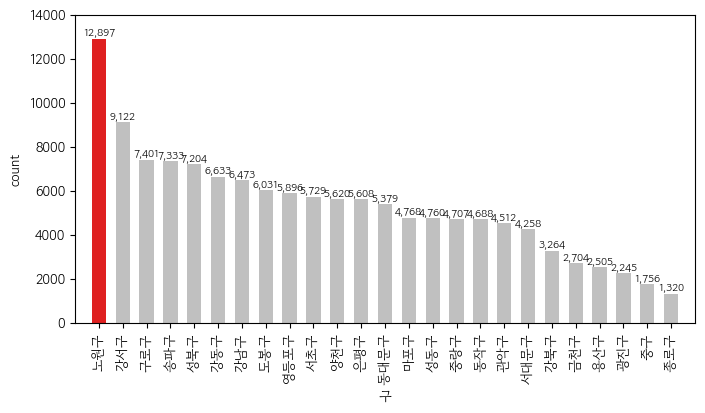

In [27]:
# plt.figure(figsize = (12, 4))
plot = sns.countplot(data = apt, x = '구', order = grp.index, 
                     width = 0.6, palette = myPal2)
plt.xticks(rotation = 90)
plt.xlim(-1, 25)
plt.ylim(0, 14000)

for i, v in enumerate(grp):
    plt.text(x = i, y = v + 100, s = f'{v:,}', 
             ha = 'center', va = 'bottom', fontsize = 8);

In [28]:
figure = plot.get_figure()
figure.savefig(fname = 'sample.png', bbox_inches = 'tight', pad_inches = 0.5)

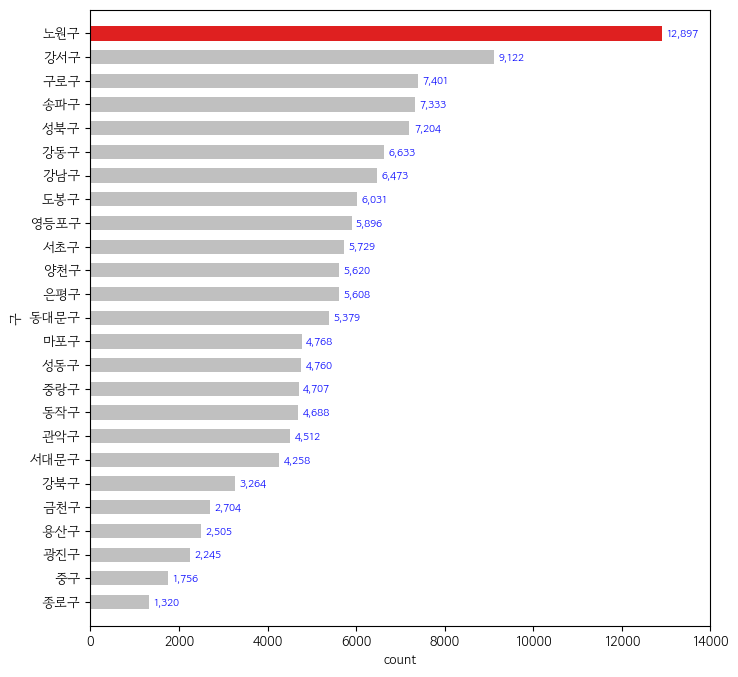

In [37]:
plt.figure(figsize = (8, 8))
sns.countplot(data = apt, y = '구', order = grp.index, 
              width = 0.6, palette = myPal2)
plt.xlim(0, 14000)
plt.ylim(25, -1)

for i, v in enumerate(grp):
    plt.text(x = v + 100, y = i, s = f'{v:,}', 
             ha = 'left', va = 'center', fontsize = 8, c = 'blue');

In [38]:
sub = apt[apt['구'].str.contains('강[남동북]')]

In [39]:
grp = sub['구'].value_counts()
grp

강동구    6633
강남구    6473
강북구    3264
Name: 구, dtype: int64

In [45]:
myPal = ['silver', 'red', 'darkred']

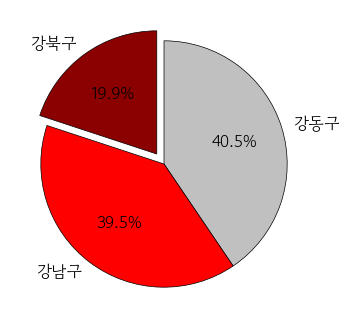

In [49]:
plt.pie(x = grp.values, 
        explode = [0, 0, 0.1], 
        labels = grp.index, 
        autopct = '%.1f%%', 
        colors = myPal, 
        startangle = 90, 
        counterclock = False, 
        textprops = dict(color = '0', size = 12), 
        wedgeprops = dict(edgecolor = '0', lw = 0.5));

In [50]:
def drawPie(x):
    plt.pie(x = x.values, 
        # explode = [0, 0, 0.1], 
        labels = x.index, 
        autopct = '%.1f%%', 
        # colors = myPal, 
        startangle = 90, 
        counterclock = False, 
        textprops = dict(color = '0', size = 12), 
        wedgeprops = dict(edgecolor = '0', lw = 0.5));

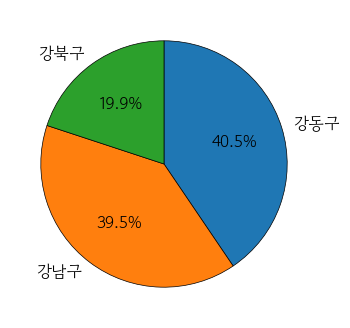

In [51]:
drawPie(x = grp)

In [52]:
gng = apt[apt['구'].eq('강남구')]
grp = gng['동'].value_counts()
grp

도곡동     1070
역삼동      790
대치동      737
개포동      673
삼성동      553
압구정동     552
수서동      518
논현동      413
일원동      345
청담동      318
자곡동      227
세곡동      163
신사동      103
율현동       11
Name: 동, dtype: int64

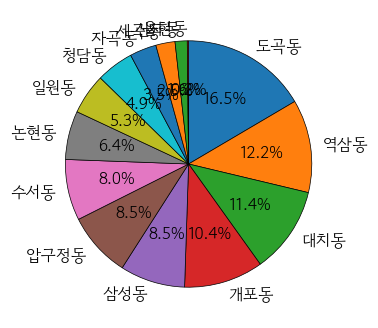

In [53]:
drawPie(x = grp)

In [62]:
grp = apt.groupby(by = ['구'])['거래금액'].mean().sort_values()
grp.head()

구
도봉구    5.049250
금천구    5.384921
중랑구    5.581186
노원구    5.752561
강북구    5.948995
Name: 거래금액, dtype: float64

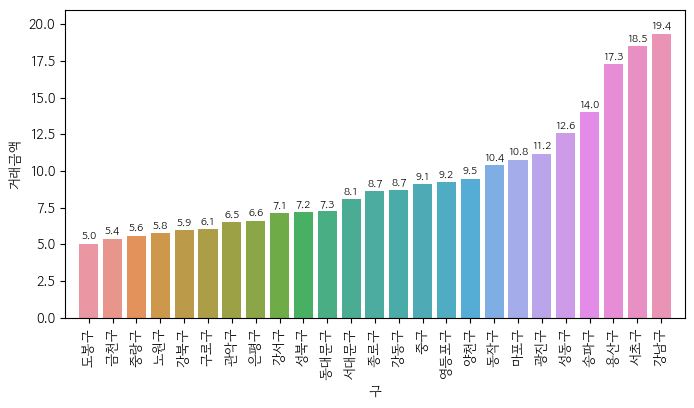

In [66]:
sns.barplot(data = apt, x = '구', y = '거래금액', order = grp.index, 
            estimator = np.mean, errorbar = None)
plt.xlim(-1, 25)
plt.ylim(0, 21)
plt.xticks(rotation = 90)

for i, v in enumerate(grp):
    plt.text(x = i, y = v + 0.2, s = f'{v:.1f}', 
             ha = 'center', va = 'bottom', fontsize = 8);

In [ ]:
gng = apt[apt['구'].eq('강남구')]

In [72]:
grp = gng.groupby(by = ['동'])['거래금액'].mean().sort_values(ascending = False)
grp.head()

동
압구정동    32.108007
도곡동     23.223569
대치동     22.877132
청담동     22.870059
개포동     18.718706
Name: 거래금액, dtype: float64

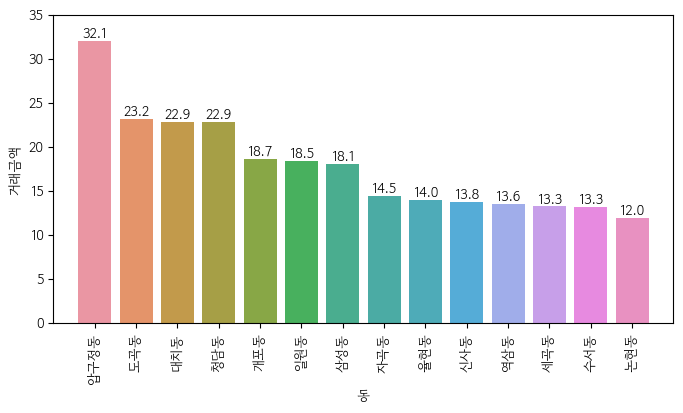

In [74]:
# gng로 동별 거래금액 평균을 막대그래프로 그려보세요.
sns.barplot(data = gng, x = '동', y = '거래금액', order = grp.index, 
            estimator = np.mean, errorbar = None)
plt.xlim(-1, 14)
plt.ylim(0, 35)
plt.xticks(rotation = 90)

for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = f'{v:.1f}', ha = 'center', va = 'bottom');

In [78]:
apt = apt.sort_values(by = '거래월', ascending = True)

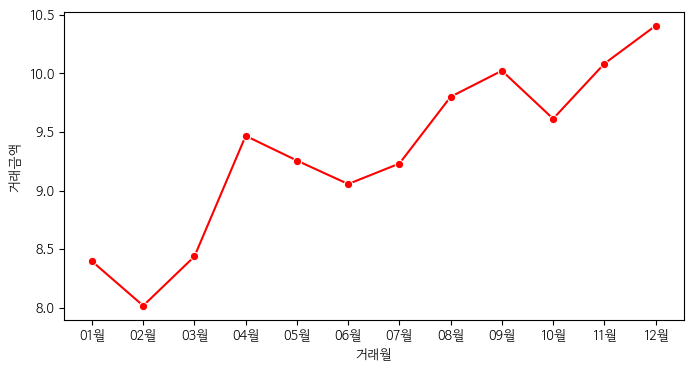

In [85]:
sns.lineplot(data = apt, x = '거래월', y = '거래금액', c = 'red', 
             estimator = np.mean, errorbar = None, marker = 'o');

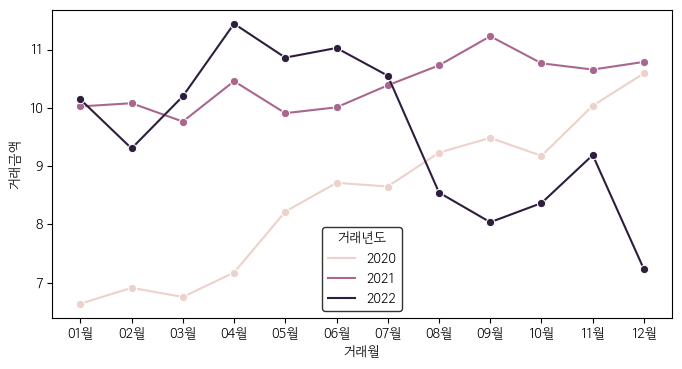

In [86]:
sns.lineplot(data = apt, x = '거래월', y = '거래금액', hue = '거래년도', 
             estimator = np.mean, errorbar = None, marker = 'o');

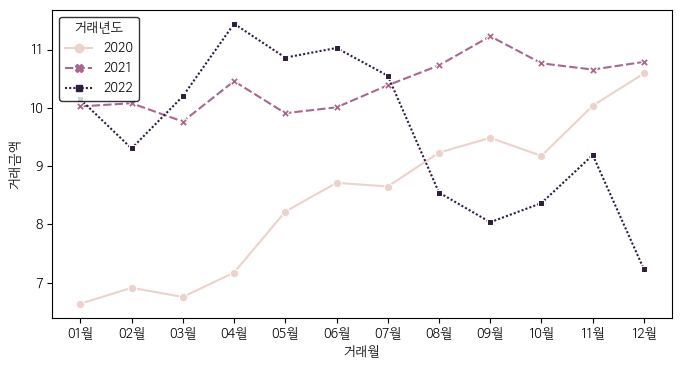

In [90]:
sns.lineplot(data = apt, x = '거래월', y = '거래금액', hue = '거래년도', 
             estimator = np.mean, errorbar = None, markers = True, 
             style = '거래년도')
plt.legend(loc = 'upper left', title = '거래년도');

In [91]:
markers = ['o', '^', 's']

In [93]:
dashes = {2020: (4, 1.5), 2021: (1, 1), 2022: (3, 1, 1.5, 1)}

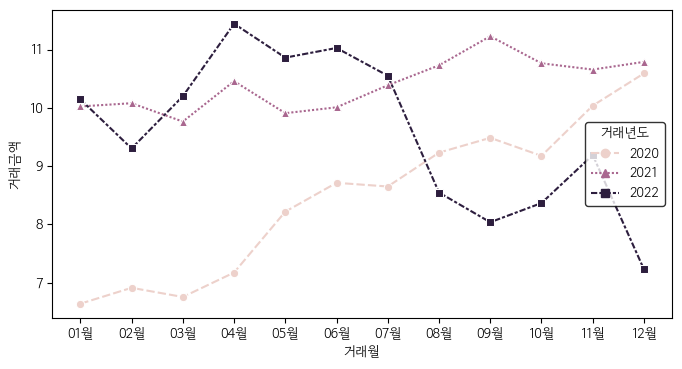

In [115]:
sns.lineplot(data = apt, x = '거래월', y = '거래금액', hue = '거래년도', 
             estimator = np.mean, errorbar = None, markers = markers, 
             style = '거래년도', dashes = dashes)
plt.legend(loc = 'center right', title = '거래년도', bbox_to_anchor = (1, 0.5));

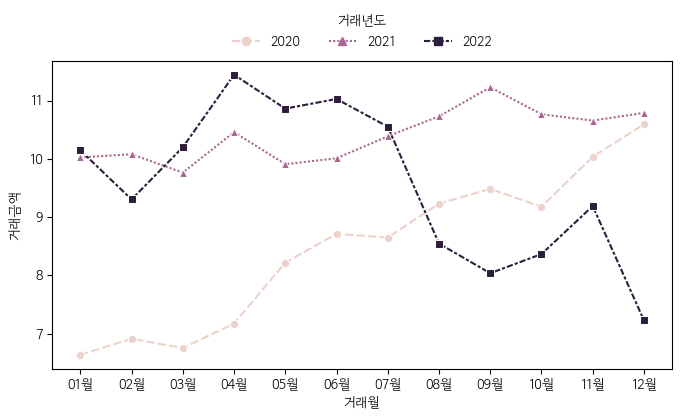

In [117]:
sns.lineplot(data = apt, x = '거래월', y = '거래금액', hue = '거래년도', 
             estimator = np.mean, errorbar = None, markers = markers, 
             style = '거래년도', dashes = dashes)
plt.legend(loc = 'lower center', title = '거래년도', bbox_to_anchor = (0.5, 1), 
           ncol = 3, frameon = False);

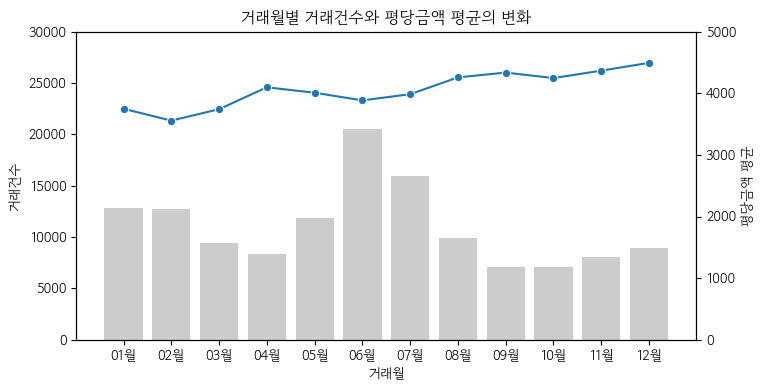

In [104]:
fig = plt.figure()
ax1 = fig.add_subplot()
sns.barplot(data = apt, x = '거래월', y = '거래금액', fc = '0.8', 
            estimator = np.size, ax = ax1)
ax1.set_ylim(0, 30000)
ax1.set_ylabel('거래건수')

ax2 = ax1.twinx()
sns.lineplot(data = apt, x = '거래월', y = '평당금액', marker = 'o', 
             estimator = np.mean, errorbar = None, ax = ax2)
ax2.set_ylim(0, 5000)
ax2.set_ylabel('평당금액 평균')
plt.title('거래월별 거래건수와 평당금액 평균의 변화');

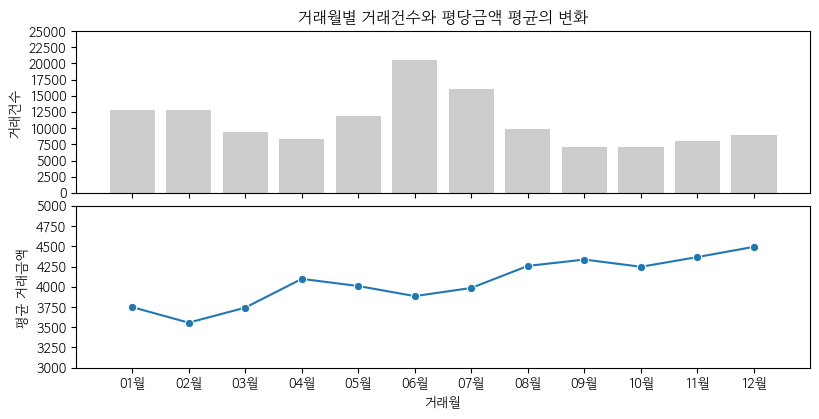

In [130]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True)
sns.barplot(data = apt, x = '거래월', y = '거래금액', fc = '0.8', 
            estimator = np.size, ax = ax1)
ax1.set_ylim(0, 25000)
ax1.set_yticks(ticks = range(0, 25001, 2500))
ax1.set_xlabel(None)
ax1.set_ylabel('거래건수')
ax1.set_title('거래월별 거래건수와 평당금액 평균의 변화')
sns.lineplot(data = apt, x = '거래월', y = '평당금액', marker = 'o', 
             estimator = np.mean, errorbar = None, ax = ax2)
ax2.set_yticks(ticks = range(3000, 5001, 250))
ax2.set_ylim(3000, 5000)
ax2.set_ylabel('평균 거래금액')
plt.tight_layout(pad = 0);

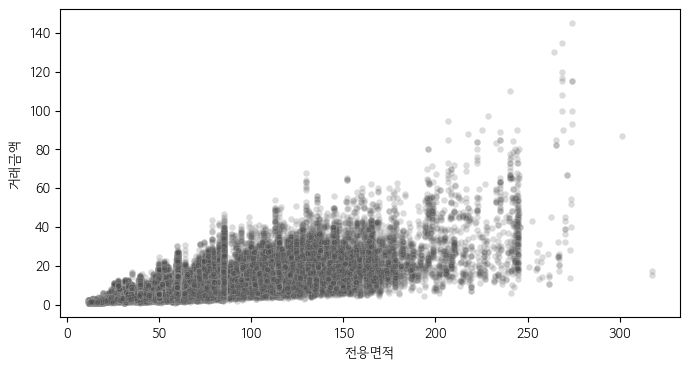

In [132]:
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                fc = '0.3', ec = '0.8', s = 20, alpha = 0.2);

In [134]:
apt = apt.sort_values(by = ['세대수'])

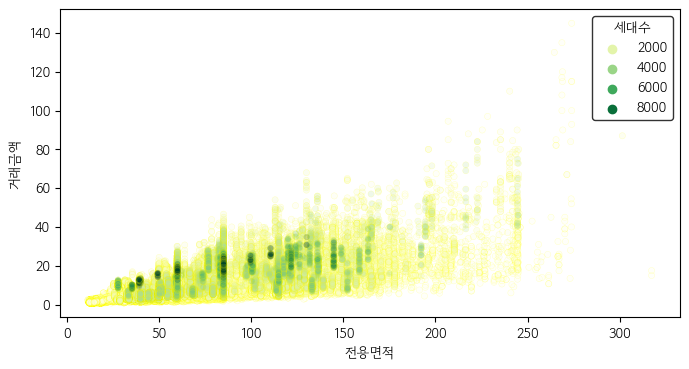

In [135]:
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                hue = '세대수', ec = 'yellow', palette = 'YlGn',  
                s = 20, alpha = 0.2);

In [136]:
gng = gng.sort_values(by = ['세대수'])

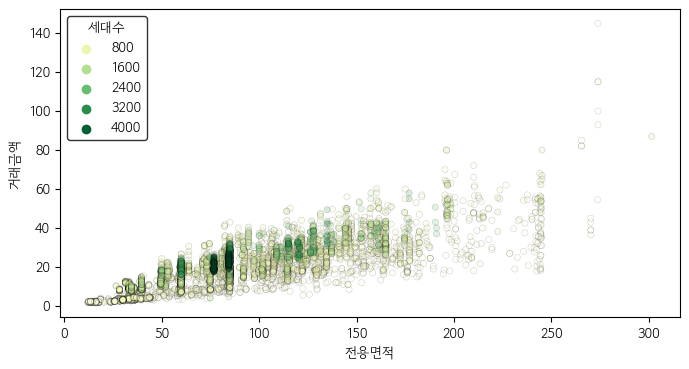

In [138]:
sns.scatterplot(data = gng, x = '전용면적', y = '거래금액', 
                hue = '세대수', ec = 'black', palette = 'YlGn',  
                s = 20, alpha = 0.2);

In [141]:
scatter = dict(fc = '0.3', ec = '0.8', s = 20, alpha = 0.2)
regline = dict(color = 'red', linewidth = 1.5)

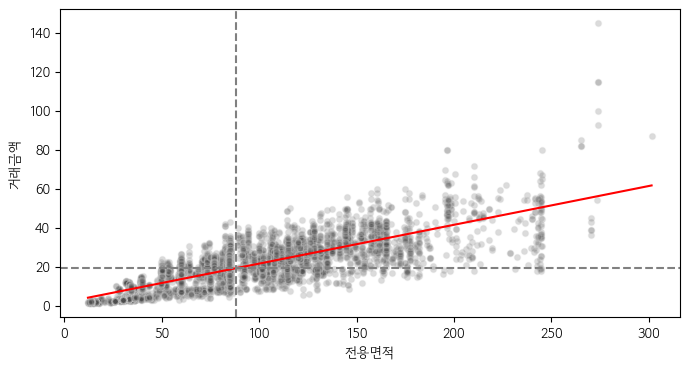

In [145]:
sns.regplot(data = gng, x = '전용면적', y = '거래금액', ci = None, 
            scatter_kws = scatter, line_kws = regline)
plt.axvline(x = gng['전용면적'].mean(), c = 'grey', ls = '--')
plt.axhline(y = gng['거래금액'].mean(), c = 'grey', ls = '--');

In [146]:
cols = ['거래금액', '전용면적', '층', '세대수']

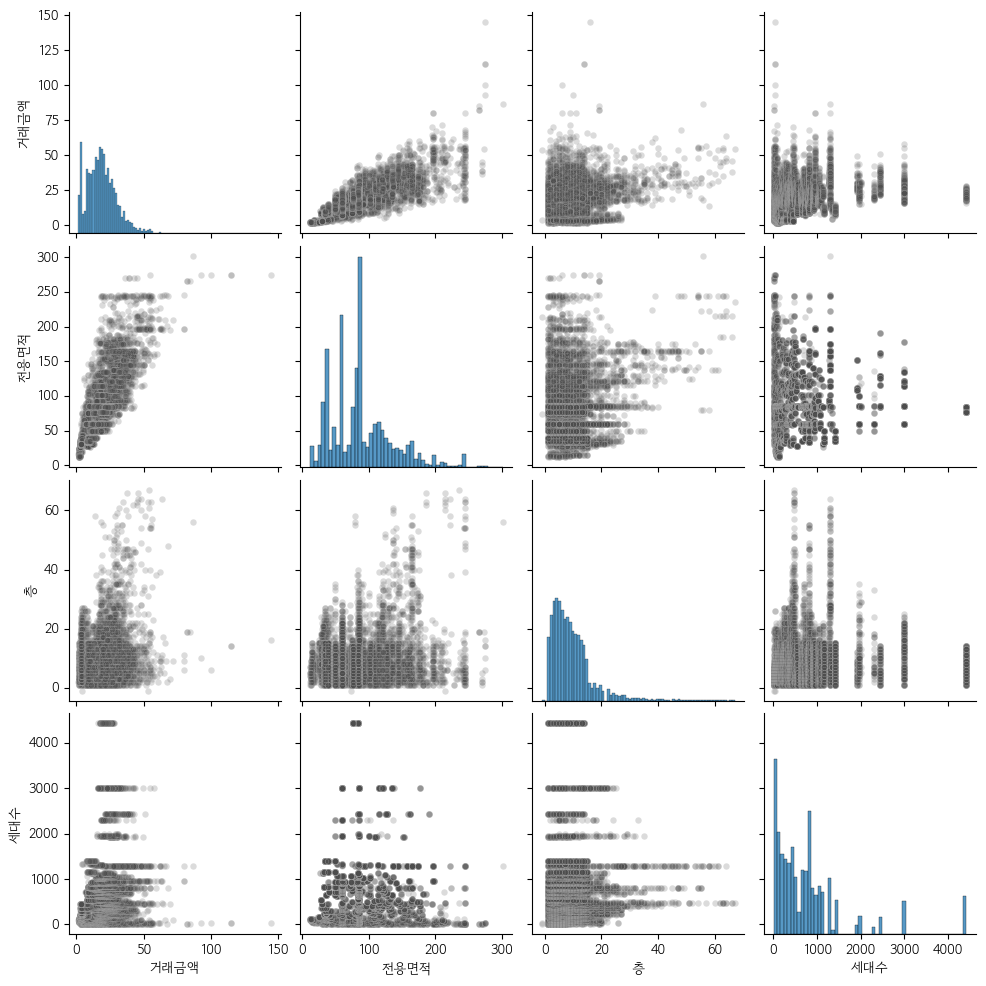

In [147]:
sns.pairplot(data = gng[cols], plot_kws = scatter);

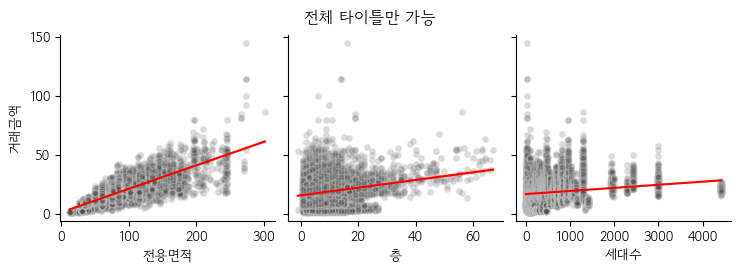

In [152]:
pp = sns.pairplot(
    data = gng,
    x_vars = ['전용면적', '층', '세대수'], 
    y_vars = ['거래금액'], 
    kind = 'reg', 
    plot_kws = dict(scatter_kws = scatter, line_kws = regline)
)
pp.fig.suptitle('전체 타이틀만 가능', y = 1.05);

In [154]:
def drawRegplot(data, x, y):
    sns.regplot(
        data = data, 
        x = x, 
        y = y, 
        ci = None, 
        scatter_kws = dict(fc = '0.3', ec = '0.8', s = 20, alpha = 0.2), 
        line_kws = dict(color = 'red', linewidth = 1.5)
    )

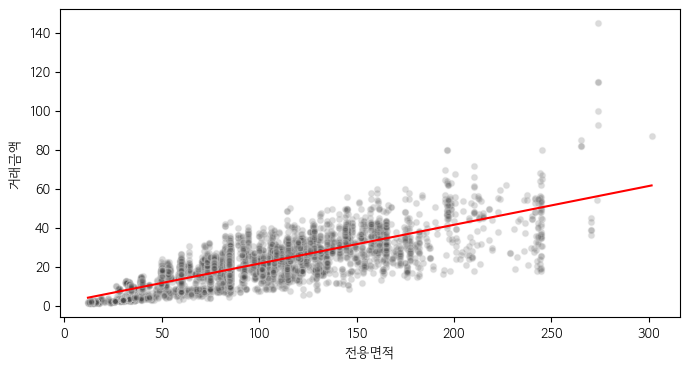

In [155]:
drawRegplot(data = gng, x = '전용면적', y = '거래금액')

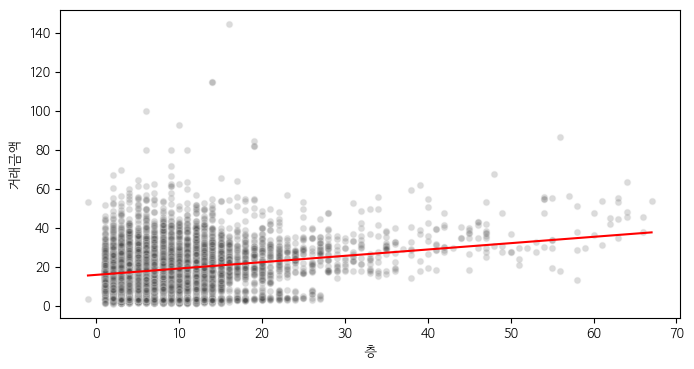

In [156]:
drawRegplot(data = gng, x = '층', y = '거래금액')

In [159]:
coef = gng.corr(numeric_only = True)
coef

,건축년도,전용면적,층,거래금액,평당금액,거래년도,경과년수,위도,경도,동수,세대수,임대수,용적률,건폐율,주차대수
건축년도,1.000000,-0.085948,0.170737,-0.171430,-0.201271,0.096841,-0.998228,-0.276558,0.124305,-0.049853,-0.219224,0.252240,0.268568,0.327714,0.049923
전용면적,-0.085948,1.000000,0.190542,0.798518,-0.015659,-0.008689,0.085774,0.140898,-0.165665,0.019100,-0.024038,-0.010967,0.011117,-0.063001,0.153516
층,0.170737,0.190542,1.000000,0.230931,0.084193,0.039184,-0.169081,-0.089245,-0.036902,-0.074875,0.050310,-0.036480,0.491294,0.144348,0.290654
거래금액,-0.171430,0.798518,0.230931,1.000000,0.507557,0.106546,0.178488,0.189415,-0.123390,0.247876,0.202997,-0.022994,-0.150181,-0.340331,0.346142
평당금액,-0.201271,-0.015659,0.084193,0.507557,1.000000,0.132258,0.209985,0.045939,0.128697,0.446157,0.424150,-0.010224,-0.423046,-0.652373,0.405383
거래년도,0.096841,-0.008689,0.039184,0.106546,0.132258,1.000000,-0.037451,0.016932,-0.039415,-0.057898,-0.023727,0.034229,0.116598,0.126502,-0.011617
경과년수,-0.998228,0.085774,-0.169081,0.178488,0.209985,-0.037451,1.000000,0.278681,-0.127161,0.046592,0.218686,-0.251208,-0.262677,-0.321468,-0.050818
위도,-0.276558,0.140898,-0.089245,0.189415,0.045939,0.016932,0.278681,1.000000,-0.676955,-0.266037,-0.205689,-0.234453,-0.007455,0.081638,-0.276219
경도,0.124305,-0.165665,-0.036902,-0.123390,0.128697,-0.039415,-0.127161,-0.676955,1.000000,0.296774,0.243784,0.298299,-0.248354,-0.316089,0.174769
동수,-0.049853,0.019100,-0.074875,0.247876,0.446157,-0.057898,0.046592,-0.266037,0.296774,1.000000,0.853729,0.223066,-0.339603,-0.423795,0.786148


<Axes: >

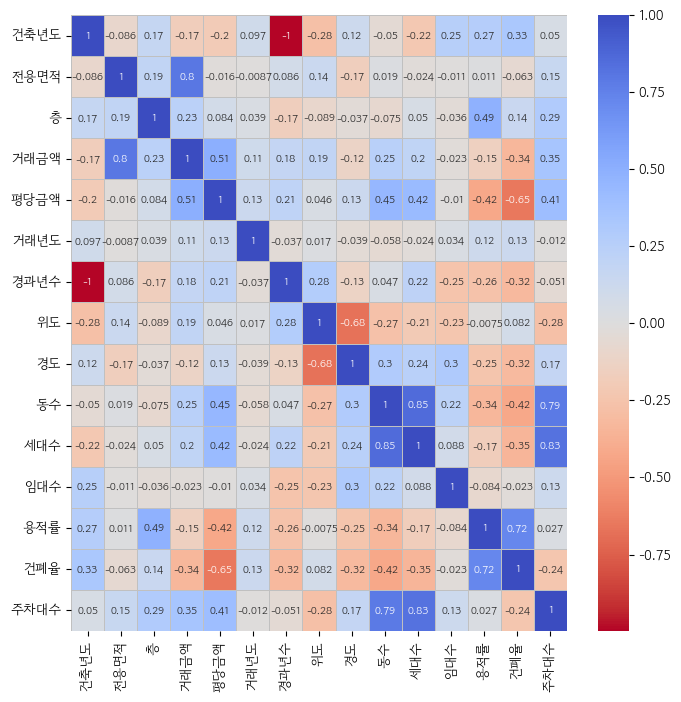

In [164]:
plt.figure(figsize = (8, 8))
sns.heatmap(data = coef, cmap = 'coolwarm_r', 
            annot = True, annot_kws = dict(size = 8), 
            linewidth = 0.5, linecolor = 'silver');